# To Predict Height & Weight of a Person 
### (Asumption- Gender taken as '0' for Male & '1' for Female)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
%matplotlib inline

In [2]:
ds=pd.read_csv(r'e:\dataScience\weight-height.csv')
ds.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
ds['Gen']=ds['Gender'].apply(lambda a:0 if a=='Male' else 1)
ds.head()

,Gender,Height,Weight,Gen
0,Male,73.847017,241.893563,0
1,Male,68.781904,162.310473,0
2,Male,74.110105,212.740856,0
3,Male,71.730978,220.042470,0
4,Male,69.881796,206.349801,0


In [4]:
vc=ds['Gender'].value_counts()
vc

Male      5000
Female    5000
Name: Gender, dtype: int64

In [5]:
ds.describe()

,Height,Weight,Gen
count,10000.000000,10000.000000,10000.000000
mean,66.367560,161.440357,0.500000
std,3.847528,32.108439,0.500025
min,54.263133,64.700127,0.000000
25%,63.505620,135.818051,0.000000
50%,66.318070,161.212928,0.500000
75%,69.174262,187.169525,1.000000
max,78.998742,269.989699,1.000000


# PREDICTING HEIGHT OF A PERSON 

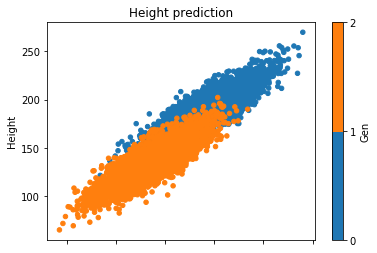

In [6]:
ds.plot(x='Height', y='Weight', c='Gen',kind='scatter',cmap=plt.cm.tab10, norm=BoundaryNorm([0, 1, 2], 2))
plt.title('Height prediction')
plt.xlabel('Gender')
plt.ylabel('Height')
plt.show()

In [7]:
X=ds.iloc[:,3].values
X




array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [8]:
x=X.reshape(-1,1)
x

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [9]:
y=ds.iloc[:,1].values
y

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
r=LinearRegression()
r.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
r.intercept_

69.03388036964316

In [13]:
r.coef_

array([-5.3271587])

In [14]:
y_pred = r.predict(x_test)

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,64.723877,63.706722
1,67.272171,69.033880
2,74.520972,69.033880
3,65.880014,63.706722
4,64.846301,69.033880


In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 2.2049608105791663
Mean Squared Error: 7.805539501270763
Root Mean Squared Error: 2.7938395625502124


#  PREDICTING WEIGHT OF A PERSON

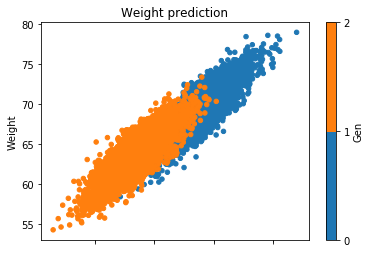

In [28]:
ds.plot(x='Weight', y='Height', c='Gen',kind='scatter',cmap=plt.cm.tab10, norm=BoundaryNorm([0, 1, 2], 2))
plt.title('Weight prediction')
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.show()

In [18]:
P=ds.iloc[:,3].values
P


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [19]:
p=P.reshape(-1,1)
p

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [20]:
q=ds.iloc[:,2].values
q

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [21]:
from sklearn.model_selection import train_test_split
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.2,random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
g=LinearRegression()
g.fit(p_train,q_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
g.intercept_

187.06097531813415

In [24]:
g.coef_

array([-51.18758532])

In [25]:
q_pred = g.predict(p_test)

In [26]:
dv = pd.DataFrame({'Actual': q_test, 'Predicted': q_pred})  
dv.head()

,Actual,Predicted
0,138.085796,135.873390
1,187.363366,187.060975
2,216.533191,187.060975
3,131.761443,135.873390
4,157.718438,187.060975


In [29]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(q_test, q_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(q_test, q_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(q_test, q_pred))) 

Mean Absolute Error: 15.542485278390853
Mean Squared Error: 381.9850034238197
Root Mean Squared Error: 19.54443663613305
